# Problem
Baseball with salary information and career statistics for 1986 Develop a machine learning model for salary estimates of players

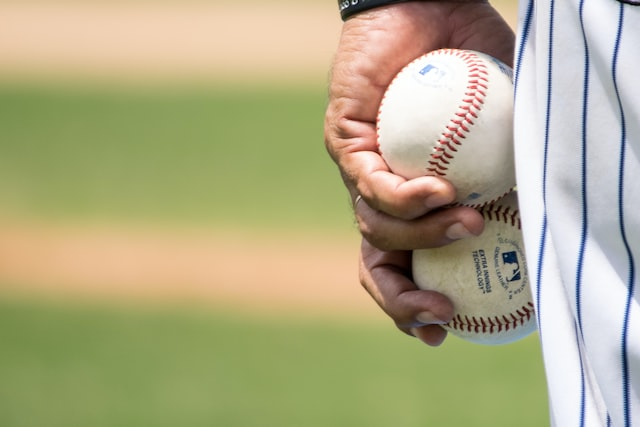

# Dataset Story

This dataset was originally located at Carnegie Mellon University.
Taken from StatLib library. Dataset 1988 ASA Graphics Section
It is part of the data used in the Poster Session. Salary data
Originally taken from Sports Illustrated, April 20, 1987. 1986 and
career statistics, Collier Books, Macmillan Publishing Company,
1987 Baseball Encyclopedia published by New York
Obtained from the update

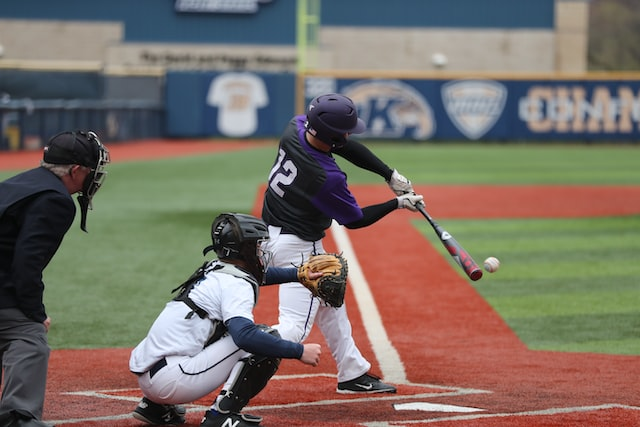

# Variables : 

1.  **AtBat** : Number of hits with a baseball bat during the 986-1987 season
2.  **Hits**  : Number of hits in the 1986-1987 season 
3.  **HmRun** : Most valuable hits in the 1986-1987 season
4.  **Runs** : The points he earned for his team in the 1986-1987 season
5.  **RBI** : Number of players a hitter had jogged when he hit
6.  **Walks** : Number of players a hitter had jogged when he hit
7.  **Years** : Player's playing time in major league (years)
8.  **CAtBat** : Number of hits during the player's career
9.  **CHits** : Number of hits made by the player throughout his career
10. **CHmRun** : The player's most valuable point during his career 
12. **CRuns** : The number of points the player has earned for his team during his career
13. **CRBI** : The number of players the player has made during his career
14. **CWalks** : Number of mistakes made by the opposing player during the player's career
15. **League** : A factor with A and N levels showing the league in which the player played until the end of the season
16. **Division** : A factor with E and W levels indicating the position played by the player at the end of 1986
17. **PutOuts** : Helping a teammate in the game
18. **Assits** : The number of assists the player made in the 1986-1987 season
19. **Errors** : The number of errors of the player in the 1986-1987 season
20. **Salary** : Salary of the player in 1986-1987 season (over thousand)
21. **NewLeague** : A factor with A and N levels showing the player's league at the start of the 1987 season

# To Do List 

* Statistical analyze  
* EDA
* Feature Engineering 
* Machine Learning Modelling
* Conclusion  

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
# import library 

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

# statistics 
from scipy.stats import ttest_1samp  

from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve 
from sklearn.model_selection import train_test_split, cross_validate  

# MODELLING 
# All Models (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# All Models (Regression)
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


# MODEL EVALUATION 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix



In [ ]:
pd.set_option('display.max_columns',None) 
pd.set_option('display.float_format',lambda x: '%3f' %x)  
pd.set_option('display.width',500)

In [ ]:
# load dataset 

df = pd.read_csv('/content/hitters.csv')

## Statistical analyze

In [ ]:
# mean  
df.mean()

<ipython-input-5-8d08c4bbb710>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


AtBat      380.928571
Hits       101.024845
HmRun       10.770186
Runs        50.909938
RBI         48.027950
Walks       38.742236
Years        7.444099
CAtBat    2648.683230
CHits      717.571429
CHmRun      69.490683
CRuns      358.795031
CRBI       330.118012
CWalks     260.239130
PutOuts    288.937888
Assists    106.913043
Errors       8.040373
Salary     535.925882
dtype: float64

In [ ]:
df.median() # median 

<ipython-input-6-b65ea4a733fa>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median() # median


AtBat      379.500000
Hits        96.000000
HmRun        8.000000
Runs        48.000000
RBI         44.000000
Walks       35.000000
Years        6.000000
CAtBat    1928.000000
CHits      508.000000
CHmRun      37.500000
CRuns      247.000000
CRBI       220.500000
CWalks     170.500000
PutOuts    212.000000
Assists     39.500000
Errors       6.000000
Salary     425.000000
dtype: float64

In [ ]:
df.mode() # mode

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,209.000000,53.000000,4.000000,42.000000,29.000000,22.000000,4.000000,41,160.000000,32.000000,20.000000,32.000000,55.000000,A,W,0.000000,0.000000,3.000000,750.000000,A
1,216.000000,70.000000,NaN,NaN,NaN,NaN,NaN,216,238.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,315.000000,76.000000,NaN,NaN,NaN,NaN,NaN,312,408.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711,715.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

quantiles = [df["Salary"].quantile(0),   
            df["Salary"].quantile(0.25),
            df["Salary"].quantile(0.50),
            df["Salary"].quantile(0.75),
            df["Salary"].quantile(1)]

quantiles

[67.5, 190.0, 425.0, 750.0, 2460.0]

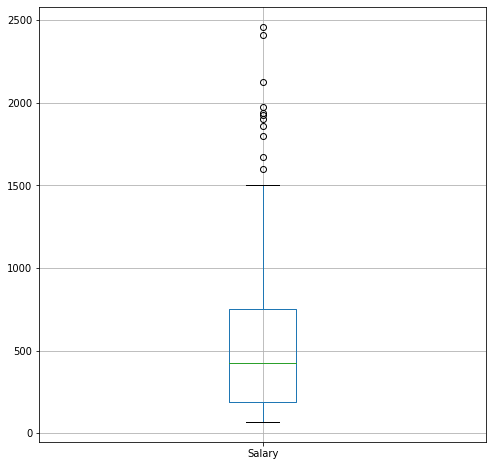

In [ ]:
# Let's visualize the quarters.

df.boxplot(column="Salary",
               return_type='axes',
               figsize=(8,8))


In [ ]:
# descriptive analyze
df["Salary"].describe()


count    263.000000
mean     535.925882
std      451.118681
min       67.500000
25%      190.000000
50%      425.000000
75%      750.000000
max     2460.000000
Name: Salary, dtype: float64

In [ ]:
# check the standard deviation
df["Salary"].std()


451.11868070253865

In [ ]:
# all statistics information about dataset 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AtBat,322.000000,NaN,NaN,NaN,380.928571,153.404981,16.000000,255.250000,379.500000,512.000000,687.000000
Hits,322.000000,NaN,NaN,NaN,101.024845,46.454741,1.000000,64.000000,96.000000,137.000000,238.000000
HmRun,322.000000,NaN,NaN,NaN,10.770186,8.709037,0.000000,4.000000,8.000000,16.000000,40.000000
Runs,322.000000,NaN,NaN,NaN,50.909938,26.024095,0.000000,30.250000,48.000000,69.000000,130.000000
RBI,322.000000,NaN,NaN,NaN,48.027950,26.166895,0.000000,28.000000,44.000000,64.750000,121.000000
Walks,322.000000,NaN,NaN,NaN,38.742236,21.639327,0.000000,22.000000,35.000000,53.000000,105.000000
Years,322.000000,NaN,NaN,NaN,7.444099,4.926087,1.000000,4.000000,6.000000,11.000000,24.000000
CAtBat,322.000000,NaN,NaN,NaN,2648.683230,2324.205870,19.000000,816.750000,1928.000000,3924.250000,14053.000000
CHits,322.000000,NaN,NaN,NaN,717.571429,654.472627,4.000000,209.000000,508.000000,1059.250000,4256.000000
CHmRun,322.000000,NaN,NaN,NaN,69.490683,86.266061,0.000000,14.000000,37.500000,90.000000,548.000000


t- test
* this test is used to determine whether there are significant differences between the means of 2 groups that may be related.

T-test has 2 types :

* one sampled t-test
* two-sampled t-test.
1.One sample t-test 

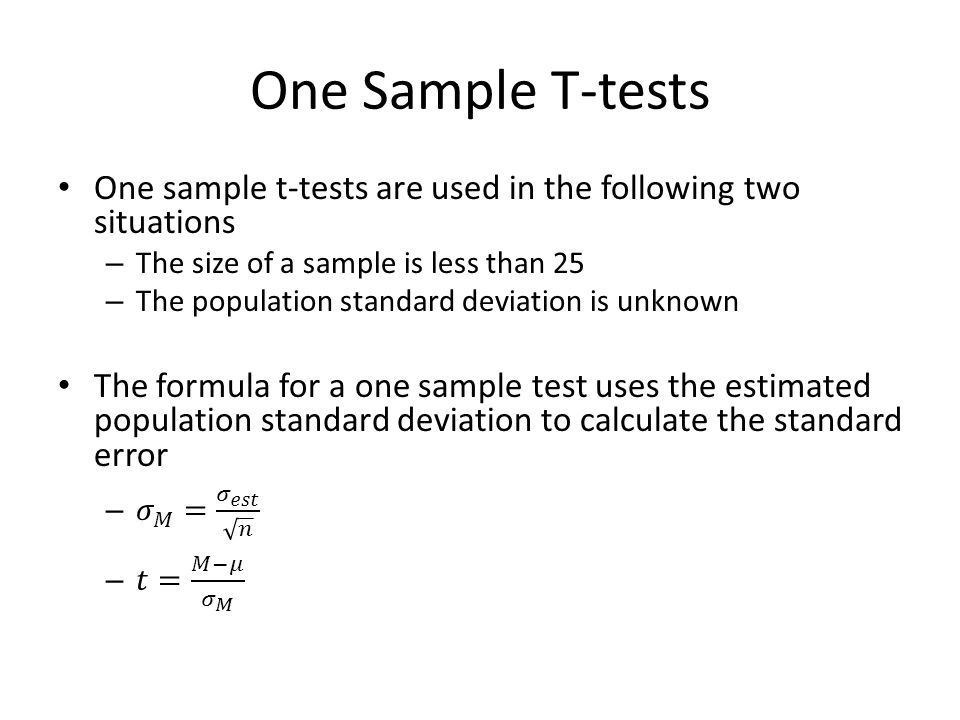

In [ ]:
df["Salary"].head()

0          NaN
1   475.000000
2   480.000000
3   500.000000
4    91.500000
Name: Salary, dtype: float64

In [ ]:
print(475.000000 + 480.000000 + 500.000000 + 91.500000 / 4 )

1477.875


In [ ]:
# one sample p value 

# Assume that we have a sample, `sample`, and a known population mean, `pop_mean`
sample = [174800 , 169250 , 163700 , 162310]
pop_mean = 548327.5

# Calculate the t-statistic and p-value
t_statistic, p_value = ttest_1samp(sample, pop_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -133.44213430564741
p-value: 9.27906064206543e-07


## chi-square test
This test is applied when there are two categorical variables from a single population. It is used to determine whether there is a significant relationship between the two variables. 

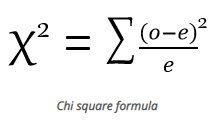



In [ ]:
df_chi = pd.crosstab(df['League'],df['NewLeague']) 
print(df_chi)

NewLeague    A    N
League             
A          166    9
N           10  137


# EDA

## Check Info about dataset

In [ ]:
df.head() # show first 5 data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


In [ ]:
df.tail() # show last 5 data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000000,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.000000,A


In [ ]:
df.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

Total Dtype 
Int/float: 16 + 1 = 17  
Object = 3 

In [ ]:

# functional EDA analysis in IRL data 

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors     Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20        NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N  

## Categorical and Numerical Values

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "0"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                dataframe[col].dtypes != "0"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                dataframe[col].dtypes == "0"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations:{dataframe.shape[0]}")
    print(f"Variables:{dataframe.shape[1]}")
    print(f'cat_cols:"{len(cat_cols)}')
    print(f'num_cols:"{len(num_cols)}')
    print(f'cat_but_car:"{len(cat_but_car)}')
    print(f'num_but_cat:"{len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations:322
Variables:20
cat_cols:"3
num_cols:"17
cat_but_car:"0
num_but_cat:"3


In [ ]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [ ]:
cat_cols

['League', 'Division', 'NewLeague']

In [ ]:
cat_but_car

[]

## Functional Numerical Analyze

In [ ]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)

    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)

AtBat:
count   322.000000
mean    380.928571
std     153.404981
min      16.000000
5%      161.000000
10%     194.100000
20%     221.800000
30%     281.300000
40%     321.800000
50%     379.500000
60%     430.200000
70%     490.000000
80%     535.600000
90%     584.900000
95%     609.900000
99%     658.590000
100%    687.000000
max     687.000000
Name: AtBat, dtype: float64


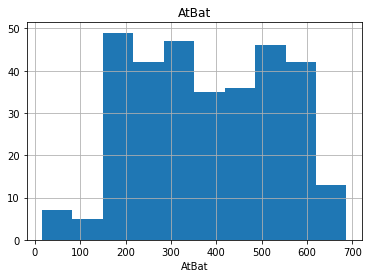

Hits:
count   322.000000
mean    101.024845
std      46.454741
min       1.000000
5%       39.000000
10%      45.100000
20%      57.000000
30%      70.000000
40%      82.000000
50%      96.000000
60%     113.000000
70%     128.700000
80%     144.000000
90%     163.000000
95%     174.000000
99%     210.790000
100%    238.000000
max     238.000000
Name: Hits, dtype: float64


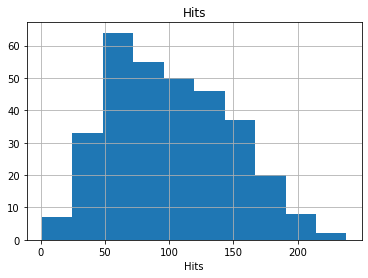

HmRun:
count   322.000000
mean     10.770186
std       8.709037
min       0.000000
5%        0.000000
10%       1.000000
20%       3.000000
30%       5.000000
40%       6.000000
50%       8.000000
60%      10.600000
70%      14.000000
80%      18.000000
90%      24.000000
95%      28.950000
99%      33.000000
100%     40.000000
max      40.000000
Name: HmRun, dtype: float64


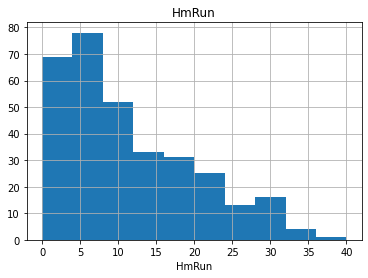

Runs:
count   322.000000
mean     50.909938
std      26.024095
min       0.000000
5%       17.000000
10%      20.100000
20%      27.000000
30%      33.000000
40%      41.000000
50%      48.000000
60%      55.600000
70%      66.000000
80%      75.800000
90%      89.000000
95%      94.000000
99%     107.790000
100%    130.000000
max     130.000000
Name: Runs, dtype: float64


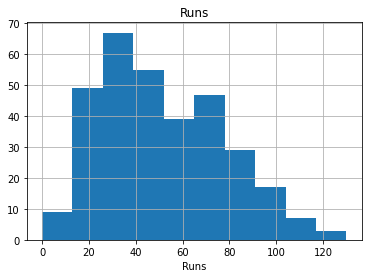

RBI:
count   322.000000
mean     48.027950
std      26.166895
min       0.000000
5%       14.000000
10%      19.000000
20%      26.000000
30%      30.000000
40%      36.400000
50%      44.000000
60%      49.000000
70%      58.000000
80%      73.000000
90%      86.000000
95%      96.000000
99%     112.370000
100%    121.000000
max     121.000000
Name: RBI, dtype: float64


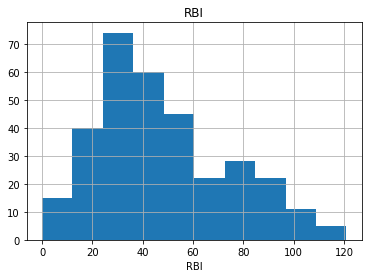

Walks:
count   322.000000
mean     38.742236
std      21.639327
min       0.000000
5%       11.050000
10%      15.000000
20%      20.000000
30%      24.000000
40%      30.000000
50%      35.000000
60%      40.000000
70%      48.700000
80%      59.000000
90%      69.900000
95%      78.000000
99%      93.580000
100%    105.000000
max     105.000000
Name: Walks, dtype: float64


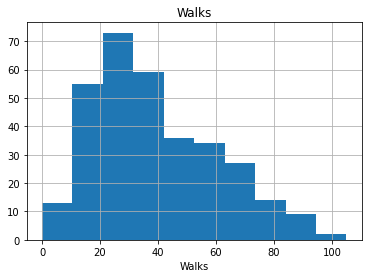

Years:
count   322.000000
mean      7.444099
std       4.926087
min       1.000000
5%        1.000000
10%       2.000000
20%       3.000000
30%       4.000000
40%       5.000000
50%       6.000000
60%       7.600000
70%      10.000000
80%      12.000000
90%      15.000000
95%      17.000000
99%      19.790000
100%     24.000000
max      24.000000
Name: Years, dtype: float64


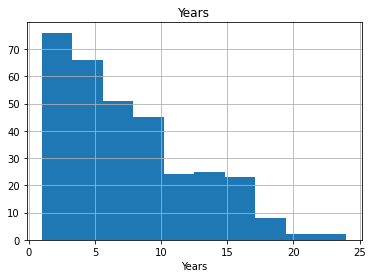

CAtBat:
count     322.000000
mean     2648.683230
std      2324.205870
min        19.000000
5%        216.500000
10%       342.200000
20%       667.600000
30%       963.400000
40%      1402.200000
50%      1928.000000
60%      2654.000000
70%      3365.000000
80%      4483.000000
90%      6123.400000
95%      7125.600000
99%      8749.970000
100%    14053.000000
max     14053.000000
Name: CAtBat, dtype: float64


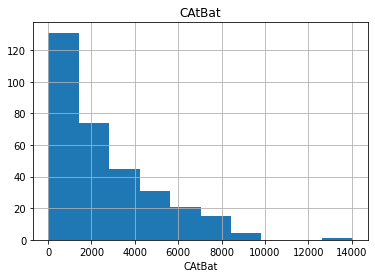

CHits:
count    322.000000
mean     717.571429
std      654.472627
min        4.000000
5%        54.000000
10%       86.000000
20%      164.600000
30%      238.000000
40%      355.800000
50%      508.000000
60%      708.200000
70%      911.100000
80%     1229.200000
90%     1659.600000
95%     2017.150000
99%     2500.340000
100%    4256.000000
max     4256.000000
Name: CHits, dtype: float64


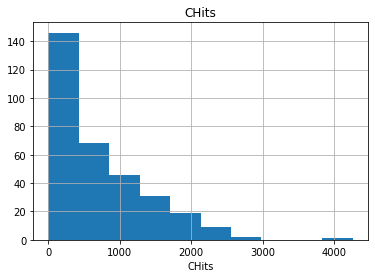

CHmRun:
count   322.000000
mean     69.490683
std      86.266061
min       0.000000
5%        2.000000
10%       4.000000
20%      10.200000
30%      16.300000
40%      27.400000
50%      37.500000
60%      51.200000
70%      72.400000
80%     103.800000
90%     194.900000
95%     265.650000
99%     373.120000
100%    548.000000
max     548.000000
Name: CHmRun, dtype: float64


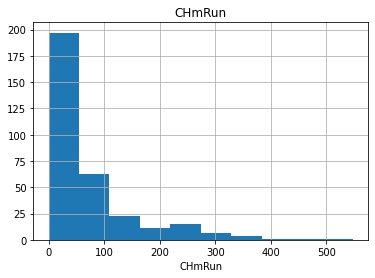

CRuns:
count    322.000000
mean     358.795031
std      334.105886
min        1.000000
5%        27.000000
10%       38.100000
20%       80.400000
30%      117.300000
40%      181.000000
50%      247.000000
60%      333.000000
70%      443.400000
80%      627.200000
90%      895.700000
95%     1032.300000
99%     1174.370000
100%    2165.000000
max     2165.000000
Name: CRuns, dtype: float64


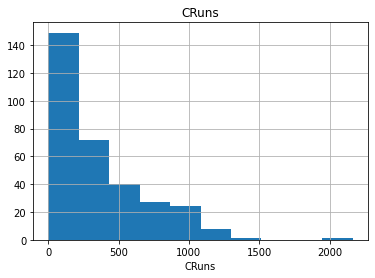

CRBI:
count    322.000000
mean     330.118012
std      333.219617
min        0.000000
5%        22.050000
10%       34.100000
20%       70.200000
30%      106.300000
40%      149.000000
50%      220.500000
60%      303.600000
70%      379.100000
80%      496.200000
90%      861.600000
95%     1071.750000
99%     1310.850000
100%    1659.000000
max     1659.000000
Name: CRBI, dtype: float64


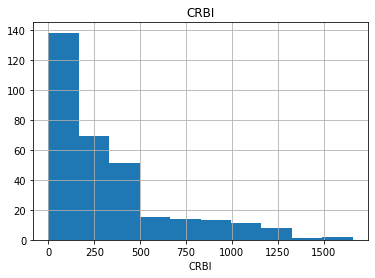

CWalks:
count    322.000000
mean     260.239130
std      267.058085
min        0.000000
5%        15.050000
10%       30.100000
20%       55.000000
30%       82.000000
40%      117.400000
50%      170.500000
60%      226.600000
70%      300.700000
80%      421.000000
90%      643.900000
95%      817.600000
99%     1139.140000
100%    1566.000000
max     1566.000000
Name: CWalks, dtype: float64


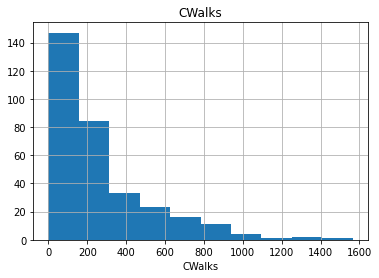

PutOuts:
count    322.000000
mean     288.937888
std      280.704614
min        0.000000
5%        33.200000
10%       62.200000
20%       99.600000
30%      132.000000
40%      167.000000
50%      212.000000
60%      257.400000
70%      303.000000
80%      365.800000
90%      685.600000
95%      910.650000
99%     1301.190000
100%    1378.000000
max     1378.000000
Name: PutOuts, dtype: float64


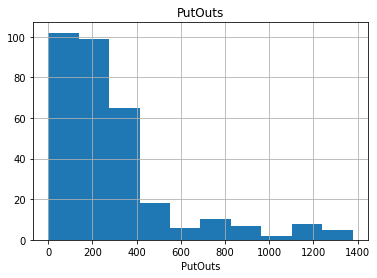

Assists:
count   322.000000
mean    106.913043
std     136.854876
min       0.000000
5%        0.000000
10%       2.000000
20%       5.200000
30%       9.000000
40%      15.400000
50%      39.500000
60%      76.800000
70%     134.800000
80%     210.800000
90%     353.300000
95%     431.450000
99%     478.160000
100%    492.000000
max     492.000000
Name: Assists, dtype: float64


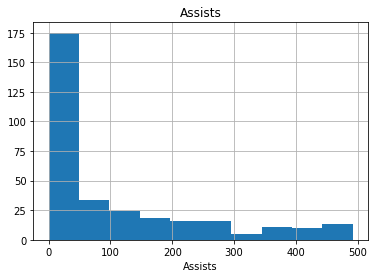

Errors:
count   322.000000
mean      8.040373
std       6.368359
min       0.000000
5%        0.000000
10%       1.000000
20%       3.000000
30%       4.000000
40%       5.000000
50%       6.000000
60%       8.000000
70%      10.000000
80%      13.000000
90%      17.000000
95%      20.000000
99%      25.790000
100%     32.000000
max      32.000000
Name: Errors, dtype: float64


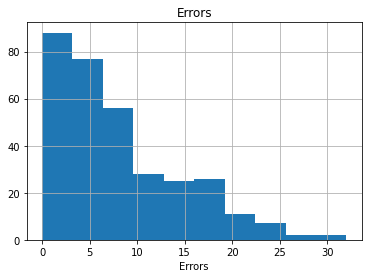

Salary:
count    263.000000
mean     535.925882
std      451.118681
min       67.500000
5%        86.600000
10%      100.000000
20%      155.000000
30%      221.000000
40%      300.000000
50%      425.000000
60%      538.000000
70%      700.000000
80%      809.000000
90%     1048.666600
95%     1346.000000
99%     2032.886540
100%    2460.000000
max     2460.000000
Name: Salary, dtype: float64


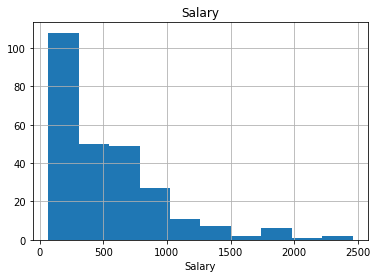

In [ ]:
for col in num_cols:
    print(f"{col}:")
    numSummary(df, col, True)

## Functional Categorical Analyze

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   League     Ratio
A     175 54.347826
N     147 45.652174
##########################################


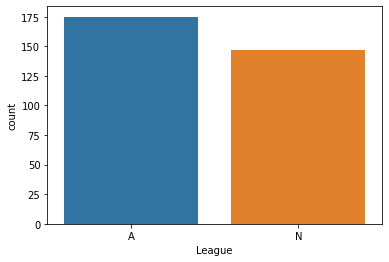

   Division     Ratio
W       165 51.242236
E       157 48.757764
##########################################


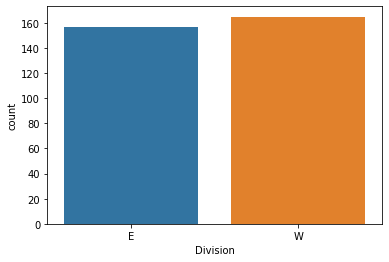

   NewLeague     Ratio
A        176 54.658385
N        146 45.341615
##########################################


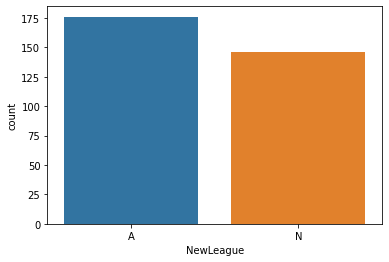

In [ ]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(col)
    else:
        cat_summary(df, col, True)

## Target Analyze

In [ ]:
df["Salary"].value_counts()

750.000000     8
100.000000     6
250.000000     6
90.000000      6
700.000000     5
              ..
490.000000     1
1861.460000    1
595.000000     1
1220.000000    1
960.000000     1
Name: Salary, Length: 150, dtype: int64

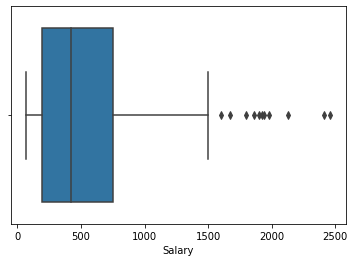

In [ ]:
# frekansları görselleştirelim

sns.boxplot(x = "Salary",data=df) 
plt.show()

In [ ]:
# bütün veriler göz önünde bulunduralım 

100 * df["Salary"].value_counts() / len(df)

750.000000    2.484472
100.000000    1.863354
250.000000    1.863354
90.000000     1.863354
700.000000    1.552795
                ...   
490.000000    0.310559
1861.460000   0.310559
595.000000    0.310559
1220.000000   0.310559
960.000000    0.310559
Name: Salary, Length: 150, dtype: float64

Target vs Features 

In [ ]:
# targetın bağımsız sınıflara ne şekilde etki ettiğini görmek istiyoruz 

df.groupby("Salary").agg({"Years":"mean"})

,Years
Salary,
67.500000,2.000000
68.000000,1.000000
70.000000,1.400000
75.000000,2.000000
80.000000,5.000000
...,...
1940.000000,9.000000
1975.000000,5.000000
2127.333000,2.000000


In [ ]:
# fonksiyonel yazmak 

def target_summary_with_num(dataframe, target, numerical_col): 
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n") 

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [ ]:
rare_analyser(df, "Salary", cat_cols)

League : 2
   COUNT    RATIO  TARGET_MEAN
A    175 0.543478   541.999547
N    147 0.456522   529.117500


Division : 2
   COUNT    RATIO  TARGET_MEAN
E    157 0.487578   624.271364
W    165 0.512422   450.876873


NewLeague : 2
   COUNT    RATIO  TARGET_MEAN
A    176 0.546584   537.113028
N    146 0.453416   534.553852




count   322.000000
mean    380.928571
std     153.404981
min      16.000000
5%      161.000000
10%     194.100000
20%     221.800000
30%     281.300000
40%     321.800000
50%     379.500000
60%     430.200000
70%     490.000000
80%     535.600000
90%     584.900000
95%     609.900000
99%     658.590000
100%    687.000000
max     687.000000
Name: AtBat, dtype: float64


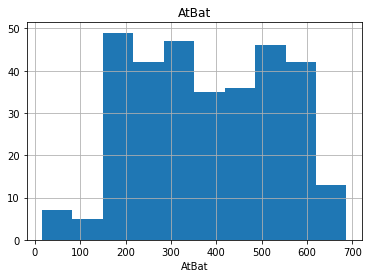

count   322.000000
mean    101.024845
std      46.454741
min       1.000000
5%       39.000000
10%      45.100000
20%      57.000000
30%      70.000000
40%      82.000000
50%      96.000000
60%     113.000000
70%     128.700000
80%     144.000000
90%     163.000000
95%     174.000000
99%     210.790000
100%    238.000000
max     238.000000
Name: Hits, dtype: float64


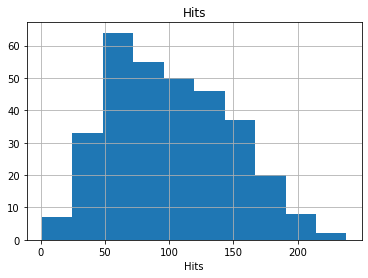

count   322.000000
mean     10.770186
std       8.709037
min       0.000000
5%        0.000000
10%       1.000000
20%       3.000000
30%       5.000000
40%       6.000000
50%       8.000000
60%      10.600000
70%      14.000000
80%      18.000000
90%      24.000000
95%      28.950000
99%      33.000000
100%     40.000000
max      40.000000
Name: HmRun, dtype: float64


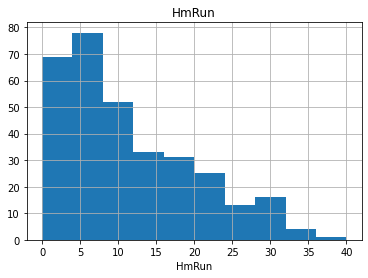

count   322.000000
mean     50.909938
std      26.024095
min       0.000000
5%       17.000000
10%      20.100000
20%      27.000000
30%      33.000000
40%      41.000000
50%      48.000000
60%      55.600000
70%      66.000000
80%      75.800000
90%      89.000000
95%      94.000000
99%     107.790000
100%    130.000000
max     130.000000
Name: Runs, dtype: float64


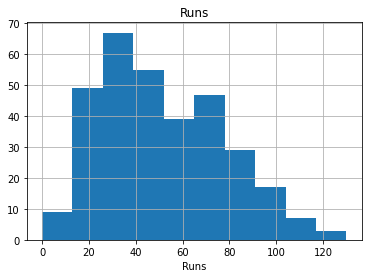

count   322.000000
mean     48.027950
std      26.166895
min       0.000000
5%       14.000000
10%      19.000000
20%      26.000000
30%      30.000000
40%      36.400000
50%      44.000000
60%      49.000000
70%      58.000000
80%      73.000000
90%      86.000000
95%      96.000000
99%     112.370000
100%    121.000000
max     121.000000
Name: RBI, dtype: float64


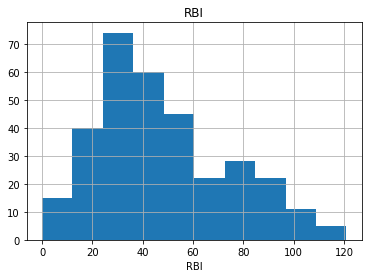

count   322.000000
mean     38.742236
std      21.639327
min       0.000000
5%       11.050000
10%      15.000000
20%      20.000000
30%      24.000000
40%      30.000000
50%      35.000000
60%      40.000000
70%      48.700000
80%      59.000000
90%      69.900000
95%      78.000000
99%      93.580000
100%    105.000000
max     105.000000
Name: Walks, dtype: float64


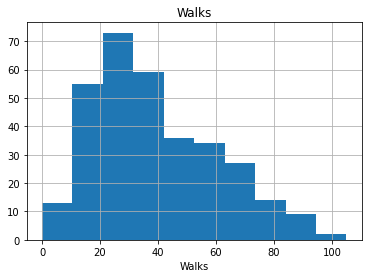

count   322.000000
mean      7.444099
std       4.926087
min       1.000000
5%        1.000000
10%       2.000000
20%       3.000000
30%       4.000000
40%       5.000000
50%       6.000000
60%       7.600000
70%      10.000000
80%      12.000000
90%      15.000000
95%      17.000000
99%      19.790000
100%     24.000000
max      24.000000
Name: Years, dtype: float64


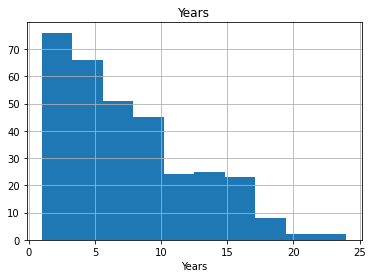

count     322.000000
mean     2648.683230
std      2324.205870
min        19.000000
5%        216.500000
10%       342.200000
20%       667.600000
30%       963.400000
40%      1402.200000
50%      1928.000000
60%      2654.000000
70%      3365.000000
80%      4483.000000
90%      6123.400000
95%      7125.600000
99%      8749.970000
100%    14053.000000
max     14053.000000
Name: CAtBat, dtype: float64


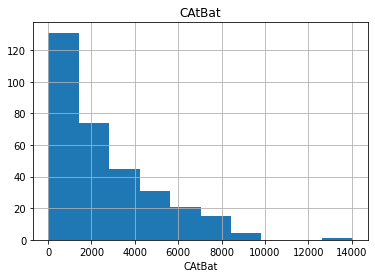

count    322.000000
mean     717.571429
std      654.472627
min        4.000000
5%        54.000000
10%       86.000000
20%      164.600000
30%      238.000000
40%      355.800000
50%      508.000000
60%      708.200000
70%      911.100000
80%     1229.200000
90%     1659.600000
95%     2017.150000
99%     2500.340000
100%    4256.000000
max     4256.000000
Name: CHits, dtype: float64


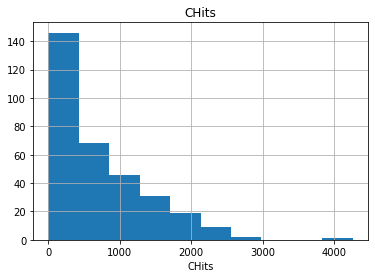

count   322.000000
mean     69.490683
std      86.266061
min       0.000000
5%        2.000000
10%       4.000000
20%      10.200000
30%      16.300000
40%      27.400000
50%      37.500000
60%      51.200000
70%      72.400000
80%     103.800000
90%     194.900000
95%     265.650000
99%     373.120000
100%    548.000000
max     548.000000
Name: CHmRun, dtype: float64


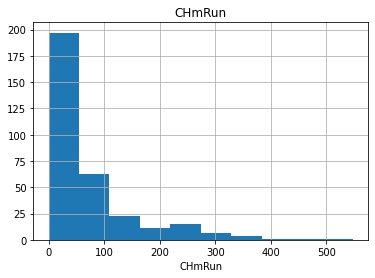

count    322.000000
mean     358.795031
std      334.105886
min        1.000000
5%        27.000000
10%       38.100000
20%       80.400000
30%      117.300000
40%      181.000000
50%      247.000000
60%      333.000000
70%      443.400000
80%      627.200000
90%      895.700000
95%     1032.300000
99%     1174.370000
100%    2165.000000
max     2165.000000
Name: CRuns, dtype: float64


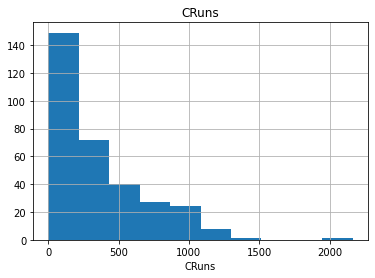

count    322.000000
mean     330.118012
std      333.219617
min        0.000000
5%        22.050000
10%       34.100000
20%       70.200000
30%      106.300000
40%      149.000000
50%      220.500000
60%      303.600000
70%      379.100000
80%      496.200000
90%      861.600000
95%     1071.750000
99%     1310.850000
100%    1659.000000
max     1659.000000
Name: CRBI, dtype: float64


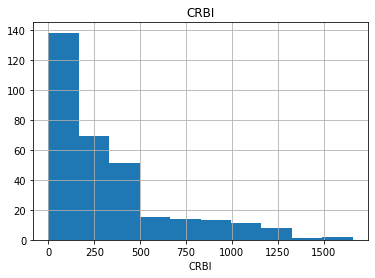

count    322.000000
mean     260.239130
std      267.058085
min        0.000000
5%        15.050000
10%       30.100000
20%       55.000000
30%       82.000000
40%      117.400000
50%      170.500000
60%      226.600000
70%      300.700000
80%      421.000000
90%      643.900000
95%      817.600000
99%     1139.140000
100%    1566.000000
max     1566.000000
Name: CWalks, dtype: float64


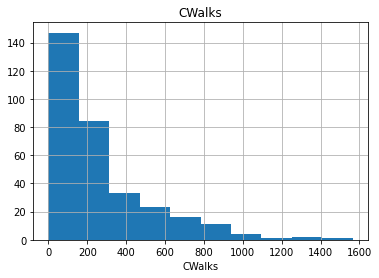

count    322.000000
mean     288.937888
std      280.704614
min        0.000000
5%        33.200000
10%       62.200000
20%       99.600000
30%      132.000000
40%      167.000000
50%      212.000000
60%      257.400000
70%      303.000000
80%      365.800000
90%      685.600000
95%      910.650000
99%     1301.190000
100%    1378.000000
max     1378.000000
Name: PutOuts, dtype: float64


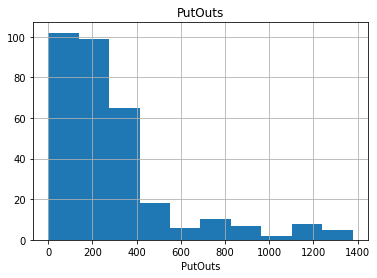

count   322.000000
mean    106.913043
std     136.854876
min       0.000000
5%        0.000000
10%       2.000000
20%       5.200000
30%       9.000000
40%      15.400000
50%      39.500000
60%      76.800000
70%     134.800000
80%     210.800000
90%     353.300000
95%     431.450000
99%     478.160000
100%    492.000000
max     492.000000
Name: Assists, dtype: float64


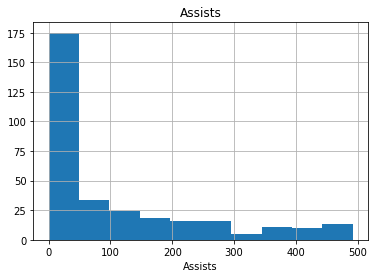

count   322.000000
mean      8.040373
std       6.368359
min       0.000000
5%        0.000000
10%       1.000000
20%       3.000000
30%       4.000000
40%       5.000000
50%       6.000000
60%       8.000000
70%      10.000000
80%      13.000000
90%      17.000000
95%      20.000000
99%      25.790000
100%     32.000000
max      32.000000
Name: Errors, dtype: float64


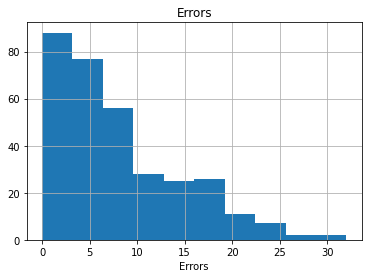

count    263.000000
mean     535.925882
std      451.118681
min       67.500000
5%        86.600000
10%      100.000000
20%      155.000000
30%      221.000000
40%      300.000000
50%      425.000000
60%      538.000000
70%      700.000000
80%      809.000000
90%     1048.666600
95%     1346.000000
99%     2032.886540
100%    2460.000000
max     2460.000000
Name: Salary, dtype: float64


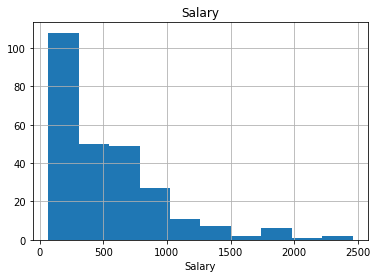

In [ ]:
for col in num_cols:
    numSummary(df, col, plot=True)

# Dashboard/ Data Visualisation

In [ ]:
!pip install pywedge   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.5 MB/s eta 0:00:00


In [ ]:
import pywedge as pw 

In [ ]:
mc = pw.Pywedge_Charts(df, c=None, y = "Salary")

/usr/local/lib/python3.8/dist-packages/pywedge/pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


In [ ]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

## Outliers

An outlier is a data point that is significantly different from the other data points in a dataset. Outliers can be caused by errors in data collection or measurement, or they may represent valid observations that are simply very different from the majority of the data. Identifying and handling outliers is an important step in data cleaning and statistical analysis. There are different ways to identify outliers such as using z-scores or Interquartile Range (IQR) methods.

In [ ]:
def outliers_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit , up_limit

In [ ]:
outliers_thresholds(df, "Years") #years 

(-23.0, 41.0)

In [ ]:
outliers_thresholds(df, "Salary") # salary

(-1802.4999999999989, 3235.0999999999976)

In [ ]:
# check outliers /boolen 
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outliers_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


(322, 20)
(308, 20)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



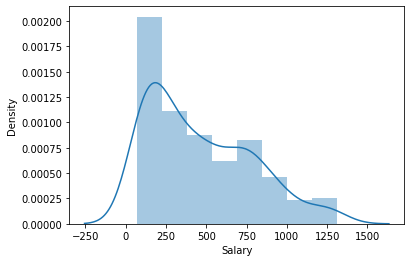

In [ ]:
# removing the values after 1300 from the data set.

print(df.shape)
df = df[(df['Salary'] < 1350) | (df['Salary'].isnull())]  # We also want missing values.
print(df.shape)
sns.distplot(df.Salary)
plt.show()

In [ ]:
def replace_with_thresholds(dataframe, variable): # I'm removing the missing values.
    low_limit, up_limit = outliers_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [ ]:
# Replace with thresholds 
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [ ]:
def replace_with_thresholds(df, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outliers_thresholds(df, variable, q1=0.05, q3=0.95)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


## Missing Value

In [ ]:
# check missing values 

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)

        n_miss     ratio
Salary      59 19.160000


## Correlation

A correlation matrix is a table showing correlation coefficients between multiple variables. Each cell in the table represents the correlation between two variables. The variables are typically listed in the rows and columns of the table, and the diagonal of the table (i.e., the cells where the row variable is the same as the column variable) will always contain 1's, since a variable is perfectly correlated with itself. The correlation coefficients are usually represented as values between -1 and 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation. Correlation matrices are commonly used in statistics and data analysis to identify relationships between variables and to help understand the relationships between different data sets.

In [ ]:
import seaborn as sb 
import matplotlib.pyplot as mp

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.969641,0.572381,0.912635,0.811416,0.656358,0.013536,0.191793,0.204810,0.186213,0.214846,0.191970,0.115109,0.289784,0.374431,0.360912,0.400782
Hits,0.969641,1.000000,0.544288,0.920586,0.799844,0.616253,0.013655,0.184052,0.206549,0.146785,0.208401,0.175619,0.096827,0.271989,0.337476,0.315128,0.420177
HmRun,0.572381,0.544288,1.000000,0.635709,0.856256,0.476914,0.089828,0.185536,0.178840,0.463639,0.217299,0.314778,0.199424,0.247348,-0.096966,0.047947,0.336097
Runs,0.912635,0.920586,0.635709,1.000000,0.788340,0.711902,-0.030168,0.138879,0.150310,0.176283,0.190258,0.148554,0.119837,0.247865,0.235125,0.247338,0.384516
RBI,0.811416,0.799844,0.856256,0.788340,1.000000,0.598126,0.105775,0.238859,0.245840,0.384799,0.258079,0.329235,0.193265,0.296728,0.121522,0.200229,0.408700
Walks,0.656358,0.616253,0.476914,0.711902,0.598126,1.000000,0.110579,0.233841,0.228996,0.300983,0.282377,0.262037,0.372412,0.295774,0.139065,0.109273,0.389686
Years,0.013536,0.013655,0.089828,-0.030168,0.105775,0.110579,1.000000,0.921182,0.907120,0.729090,0.888593,0.877126,0.844853,-0.049926,-0.073503,-0.168466,0.455871
CAtBat,0.191793,0.184052,0.185536,0.138879,0.238859,0.233841,0.921182,1.000000,0.995627,0.790606,0.984786,0.949878,0.908969,0.002167,0.007104,-0.078686,0.545899
CHits,0.204810,0.206549,0.178840,0.150310,0.245840,0.228996,0.907120,0.995627,1.000000,0.769547,0.984775,0.942219,0.892455,0.010008,0.001919,-0.077450,0.555736
CHmRun,0.186213,0.146785,0.463639,0.176283,0.384799,0.300983,0.729090,0.790606,0.769547,1.000000,0.810245,0.924529,0.807382,0.048016,-0.151798,-0.152519,0.476724


# Data Preprocessing



In [ ]:
df['NEW_HitRatio'] = df['Hits'] / df['AtBat']
df['NEW_RunRatio'] = df['HmRun'] / df['Runs']
df['NEW_CHitRatio'] = df['CHits'] / df['CAtBat']
df['NEW_CRunRatio'] = df['CHmRun'] / df['CRuns']

df['NEW_Avg_AtBat'] = df['CAtBat'] / df['Years']
df['NEW_Avg_Hits'] = df['CHits'] / df['Years']
df['NEW_Avg_HmRun'] = df['CHmRun'] / df['Years']
df['NEW_Avg_Runs'] = df['CRuns'] / df['Years']
df['NEW_Avg_RBI'] = df['CRBI'] / df['Years']
df['NEW_Avg_Walks'] = df['CWalks'] / df['Years']

### One Hot Encoding 

One hot encoding is a technique used to represent categorical variables as numerical values that can be used in machine learning and other statistical models. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_HitRatio,NEW_RunRatio,NEW_CHitRatio,NEW_CRunRatio,NEW_Avg_AtBat,NEW_Avg_Hits,NEW_Avg_HmRun,NEW_Avg_Runs,NEW_Avg_RBI,NEW_Avg_Walks,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0.225256,0.033333,0.225256,0.033333,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000,0.257143,0.291667,0.242099,0.214953,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000,0.271399,0.272727,0.281404,0.281250,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000,0.284274,0.307692,0.279851,0.271739,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000,0.271028,0.256410,0.255051,0.250000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,1,0,1


# Modelling

In [ ]:
df_null = df[df["Salary"].isnull()]  
df.dropna(inplace=True)  # Remove null value in salary

In [ ]:
y = df['Salary']
X = df.drop("Salary", axis=1)

HOLD OUT - MODEL VALIDATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Robust Scaler

A Robust Scaler is a preprocessing technique used to scale the features in a dataset to handle outliers. It uses interquartile range (IQR) instead of the standard deviation to scale the data, making it more robust to outliers and reducing their impact on the scaling.

In [ ]:
cols = X.columns  
index = X.index
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns=cols, index=index)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
X = df.drop('Salary',axis=1).values
y = df['Salary'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (199, 29)
Size of y_train :  (199, 1)
Size of X_test :  (50, 29)
Size of Y_test :  (50, 1)


In [ ]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 3.47 ms, sys: 888 µs, total: 4.36 ms
Wall time: 45.7 ms


LinearRegression()

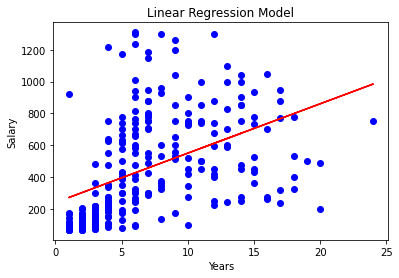

In [ ]:
# Split the data into features (X) and target (y)
X = df[['Years']]
y = df['Salary']

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Plot the data and the model predictions
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

### Linear Regression Model Evaluation 

R Square

R-squared ranges from 0 to 1, where a higher value indicates a better fit. An R-squared value of 0 means that the model does not explain any of the variance in the dependent variable, whereas an R-squared value of 1 means that the model explains all of the variance in the dependent variable 

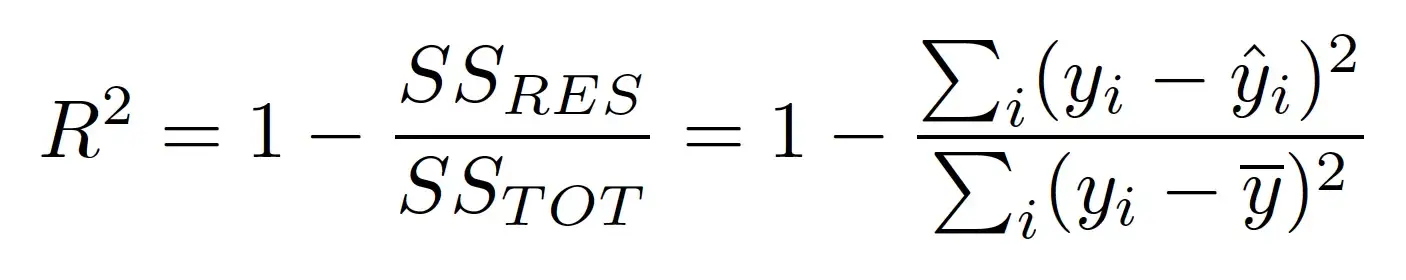

Mean Square Error(MSE)

To get rid of the negatives values, we take the square, we want to eliminate the measurement problem. 

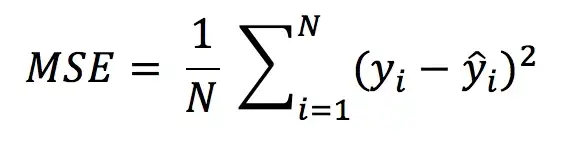

Mean Absolute Error(MAE)

Difference between the predicted values and the true values in a dataset. It is defined as the average absolute difference between the predicted values and the true values. 

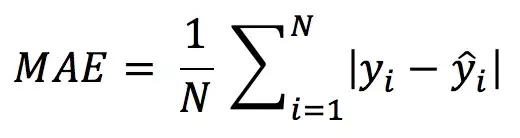

CV

Cross-validation (CV) is a resampling procedure used to evaluate the performance of machine learning models. It involves dividing a dataset into a training set and a test set, fitting the model on the training set, and evaluating the model on the test set. 

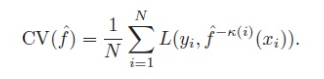

In [ ]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 5)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))
     

CV Linear Regression : 0.191
R2_score (train) : 0.494
R2_score (test) : 0.554
RMSE : 222.488


### Random Forest Regressor
A random forest regressor is used for predicting continuous numerical values

In [ ]:
X = df.drop('Salary',axis=1).values
y = df['Salary'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (199, 29)
Size of y_train :  (199, 1)
Size of X_test :  (50, 29)
Size of Y_test :  (50, 1)


In [ ]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
prediction2 = rf.predict(X_test)

<ipython-input-78-c60b295cc7e9>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
#I took the CV with 5 layers, while training with 4 of the data to get fast results,  
#it tested with 1, that is, it verified my model. same way i analyzed R2 train and test scores

%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=5, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



CPU times: user 5.41 s, sys: 480 ms, total: 5.89 s
Wall time: 8min 31s


In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, y_train)

<ipython-input-80-b4b448785db6>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [ ]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.596
R2 score (train) : 0.748
R2 score (test) : 0.772
RMSE : 159.185


### Decision Tree Regressor
This is a model that uses a tree-like structure to make predictions based on the input features. It is a non-linear model that can capture complex relationships in the data.


In [ ]:
X = df.drop('Salary',axis=1).values
y = df['Salary'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (199, 29)
Size of y_train :  (199, 1)
Size of X_test :  (50, 29)
Size of Y_test :  (50, 1)


In [ ]:
X = df[['Years']]
y = df['Salary']

In [ ]:
dc_regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
dc_regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
dc_regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

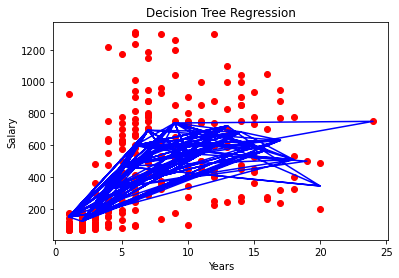

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, dc_regressor.predict(X), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

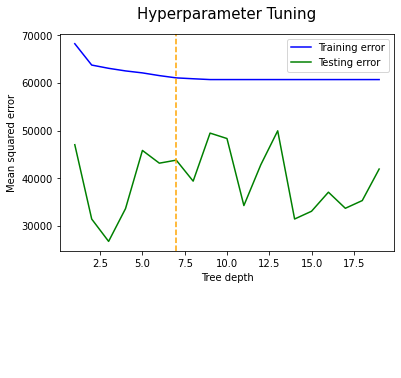

In [ ]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [ ]:

# Use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the scores
print(scores)
     

[ 0.39509038 -0.05034916  0.1739646   0.2560369   0.17805515]


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = np.abs(scores)
print(np.mean(mse_scores))
print(np.std(mse_scores))

84905.31877706577
21286.69069526605


In [ ]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
# Make predictions on the test data
y_pred = model.predict(X)

# Calculate the evaluation metrics 
mae = mean_absolute_error(y, y_pred) 
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Print the results
print("Mean absolute error:", mae) 
print("R-square error:", r2) 
print("Mean squared error:", mse)
print("Root mean squared error:", rmse) 
print("Cross-validation scores:", cv_scores.mean()) 


Mean absolute error: 231.51191175540413
R-square error: 0.20781838898258842
Mean squared error: 83220.12432098176
Root mean squared error: 288.4789841929248
Cross-validation scores: -84905.31877706577


### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Create an SVR object
svr = SVR(kernel='linear')

# Fit the model on the data
svr.fit(X, y)

# Predict values for new data
y_pred = svr.predict(X)


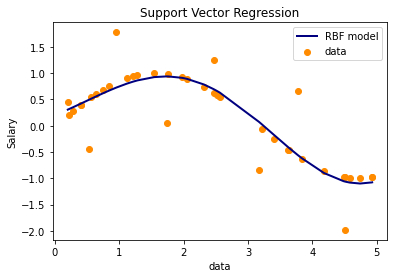

In [ ]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

# Plot the data and the SVR model
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.xlabel('data')
plt.ylabel('Salary')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate some sample data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_rbf.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
rmse_svr = np.sqrt(mse)
cvr_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Mean Absolute Error: ", mae_svr)
print("Mean Squared Error: ", mse_svr)
print("R-squared: ", r2_svr)
print("Root Mean Squared Error: ", rmse_svr) 
print("Cross-validation scores:", cvr_scores.mean()) 



Mean Absolute Error:  0.326929652269342
Mean Squared Error:  0.2944857164731232
R-squared:  0.7487588999855669
Root Mean Squared Error:  288.4789841929248
Cross-validation scores: -0.8150538740431132


In [ ]:
def all_models(X, y, test_size=0.2, random_state=12345, classification=True):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
    all_models = []

    if classification:
        models = [('LR', LogisticRegression(random_state=random_state)),
                  ('KNN', KNeighborsClassifier()),
                  ('CART', DecisionTreeClassifier(random_state=random_state)),
                  ('RF', RandomForestClassifier(random_state=random_state)),
                  ('SVM', SVC(gamma='auto', random_state=random_state)),
                  ('XGB', GradientBoostingClassifier(random_state=random_state)),
                  ("LightGBM", LGBMClassifier(random_state=random_state)),
                  ("CatBoost", CatBoostClassifier(verbose=False, random_state=random_state))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            values = dict(name=name, acc_train=acc_train, acc_test=acc_test)
            all_models.append(values)

        sort_method = False
    else:
        models = [('LR', LinearRegression()),
                  ("Ridge", Ridge()),
                  ("Lasso", Lasso()),
                  ("ElasticNet", ElasticNet()),
                  ('KNN', KNeighborsRegressor()),
                  ('CART', DecisionTreeRegressor()),
                  ('RF', RandomForestRegressor()),
                  ('SVR', SVR()),
                  ('GBM', GradientBoostingRegressor()),
                  ("XGBoost", XGBRegressor()),
                  ("LightGBM", LGBMRegressor()),
                  ("CatBoost", CatBoostRegressor(verbose=False))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            values = dict(name=name, RMSE_TRAIN=rmse_train, RMSE_TEST=rmse_test)
            all_models.append(values)

        sort_method = True
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[2], ascending=sort_method)
    print(all_models_df)
    return all_models_df


all_models = all_models(X, y, test_size=0.2, random_state=46, classification=False)

[14:19:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          name  RMSE_TRAIN  RMSE_TEST
7          SVR    0.415488   0.377684
4          KNN    0.351081   0.393113
6           RF    0.192084   0.479528
9      XGBoost    0.071892   0.509281
0           LR    0.584269   0.525300
1        Ridge    0.584328   0.525565
11    CatBoost    0.066127   0.526139
8          GBM    0.020497   0.547288
5         CART    0.000000   0.557297
3   ElasticNet    0.702149   0.747581
10    LightGBM    0.800045   0.910594
2        Lasso    0.800045   0.910594


# Conclusion

The model with the highest success rate "LightGBM", "Lasso", "ElasticNet"